In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X= []
Y= []

for i in range (167):
  X.append([np.random.randn()+0, np.random.randn()+0])
  Y.append([1, 0, 0])

for i in range (167):
  X.append([np.random.randn()+0, np.random.randn()+0])
  Y.append([0, 1, 0])

for i in range (166):
  X.append([np.random.randn()+0, np.random.randn()+0])
  Y.append([0, 0, 1])

X= np.array(X)
Y= np.array(Y)

print(X.shape)
print(Y.shape)

(500, 2)
(500, 3)


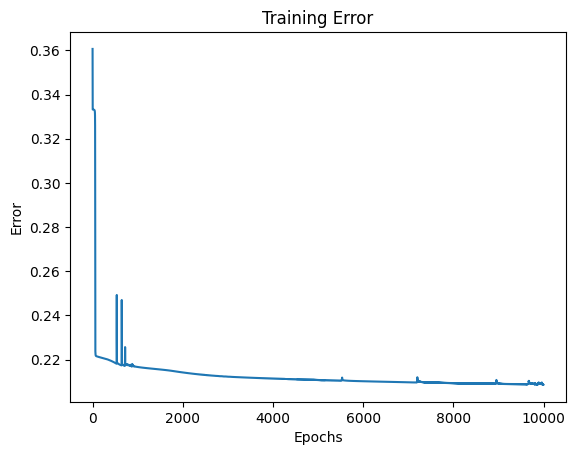

In [9]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 7
        outLayerNeuron = 3

        self.learning_rate = 0.2
        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2H1I = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH2 = np.random.randn(hiddenLayer2Neurons, outLayerNeuron)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1/(1+np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1I)
        self.hidden2_output = self.sigmoid(hidden2_input)

        output_input = np.dot(self.hidden2_output, self.W_OH2)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_OH2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1I.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1I += self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH2 += self.hidden2_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

NN = NeuralNetwork()
err = []

for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.show()

In [10]:
predictions = NN.feedForward(X)
predicted_class = np.argmax (predictions, axis =1)
true_class = np.argmax(Y, axis=1)
accuracy = np.mean(predicted_class == true_class) * 100
print("Accuracy: ", accuracy, "%")

Accuracy:  41.4 %
